In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta, datetime
from matplotlib import font_manager, rc
from matplotlib.ticker import MaxNLocator

from IPython.display import Image # 이미지 삽입

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

In [6]:
# outliar 제거 함수 (IQR 설정) (1)
def remove_out(dataframe, remove_col) :
    dff = dataframe
    for k in remove_col :
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        outliar_h = dff[k] >= level_3q + (rev_range * IQR)
        outliar_l = dff[k] <= level_1q - (rev_range * IQR)
        a=dff[outliar_h].index
        b=dff[outliar_l].index
        dff.drop(a, inplace=True)
        dff.drop(b, inplace=True)

#그래프 2개 비교 (차이 비교) -- 숫자를 표시안함
def difference(dataframe1, dataframe2) :    
    diff = np.subtract(dataframe1,dataframe2)
    
    # diff가 0보다 작은 index 찾는 것
    diff_down = dataframe2.loc[diff.loc[diff < 0].index]
    display(diff_down.index)
    
    # diff의 값을 평균내는 부분
    print(diff.describe())
    
    # 20%인 위치 값 찾기
    try :
        sorted_diff = diff.sort_values()
        ten_percent_index = int(len(sorted_diff) * 0.1)
        ten_percent_value = sorted_diff.iloc[ten_percent_index]
        print("10% value: ", ten_percent_value)
    except IndexError as e:
        if "single positional indexer is out-of-bounds" in str(e):
            print("매우나쁨 농도가 없습니다.")
        else:
            raise e
    finally :
        # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
        plt.plot(dataframe1.index,diff)
        for i in range(len(dataframe1.index)):
            height = diff[i]
            plt.text(dataframe1.index[i], height + 0.01, '%.2f' %height, ha='center', va='bottom', size = 25)
        plt.title("Difference between airm-airKorea")
        plt.xlabel("Hour")
        plt.ylabel("diff")
        plt.show()
    
# 아림의 미세먼지 농도가 매우나쁨 이상일 때, airKorea의 미세먼지 농도의 평가
def air_quality_label(pm25):
    if pm25 <= 15:
        return '좋음'
    elif pm25 <= 35:
        return '보통'
    elif pm25 <= 75:
        return '나쁨'
    else:
        return '매우 나쁨'

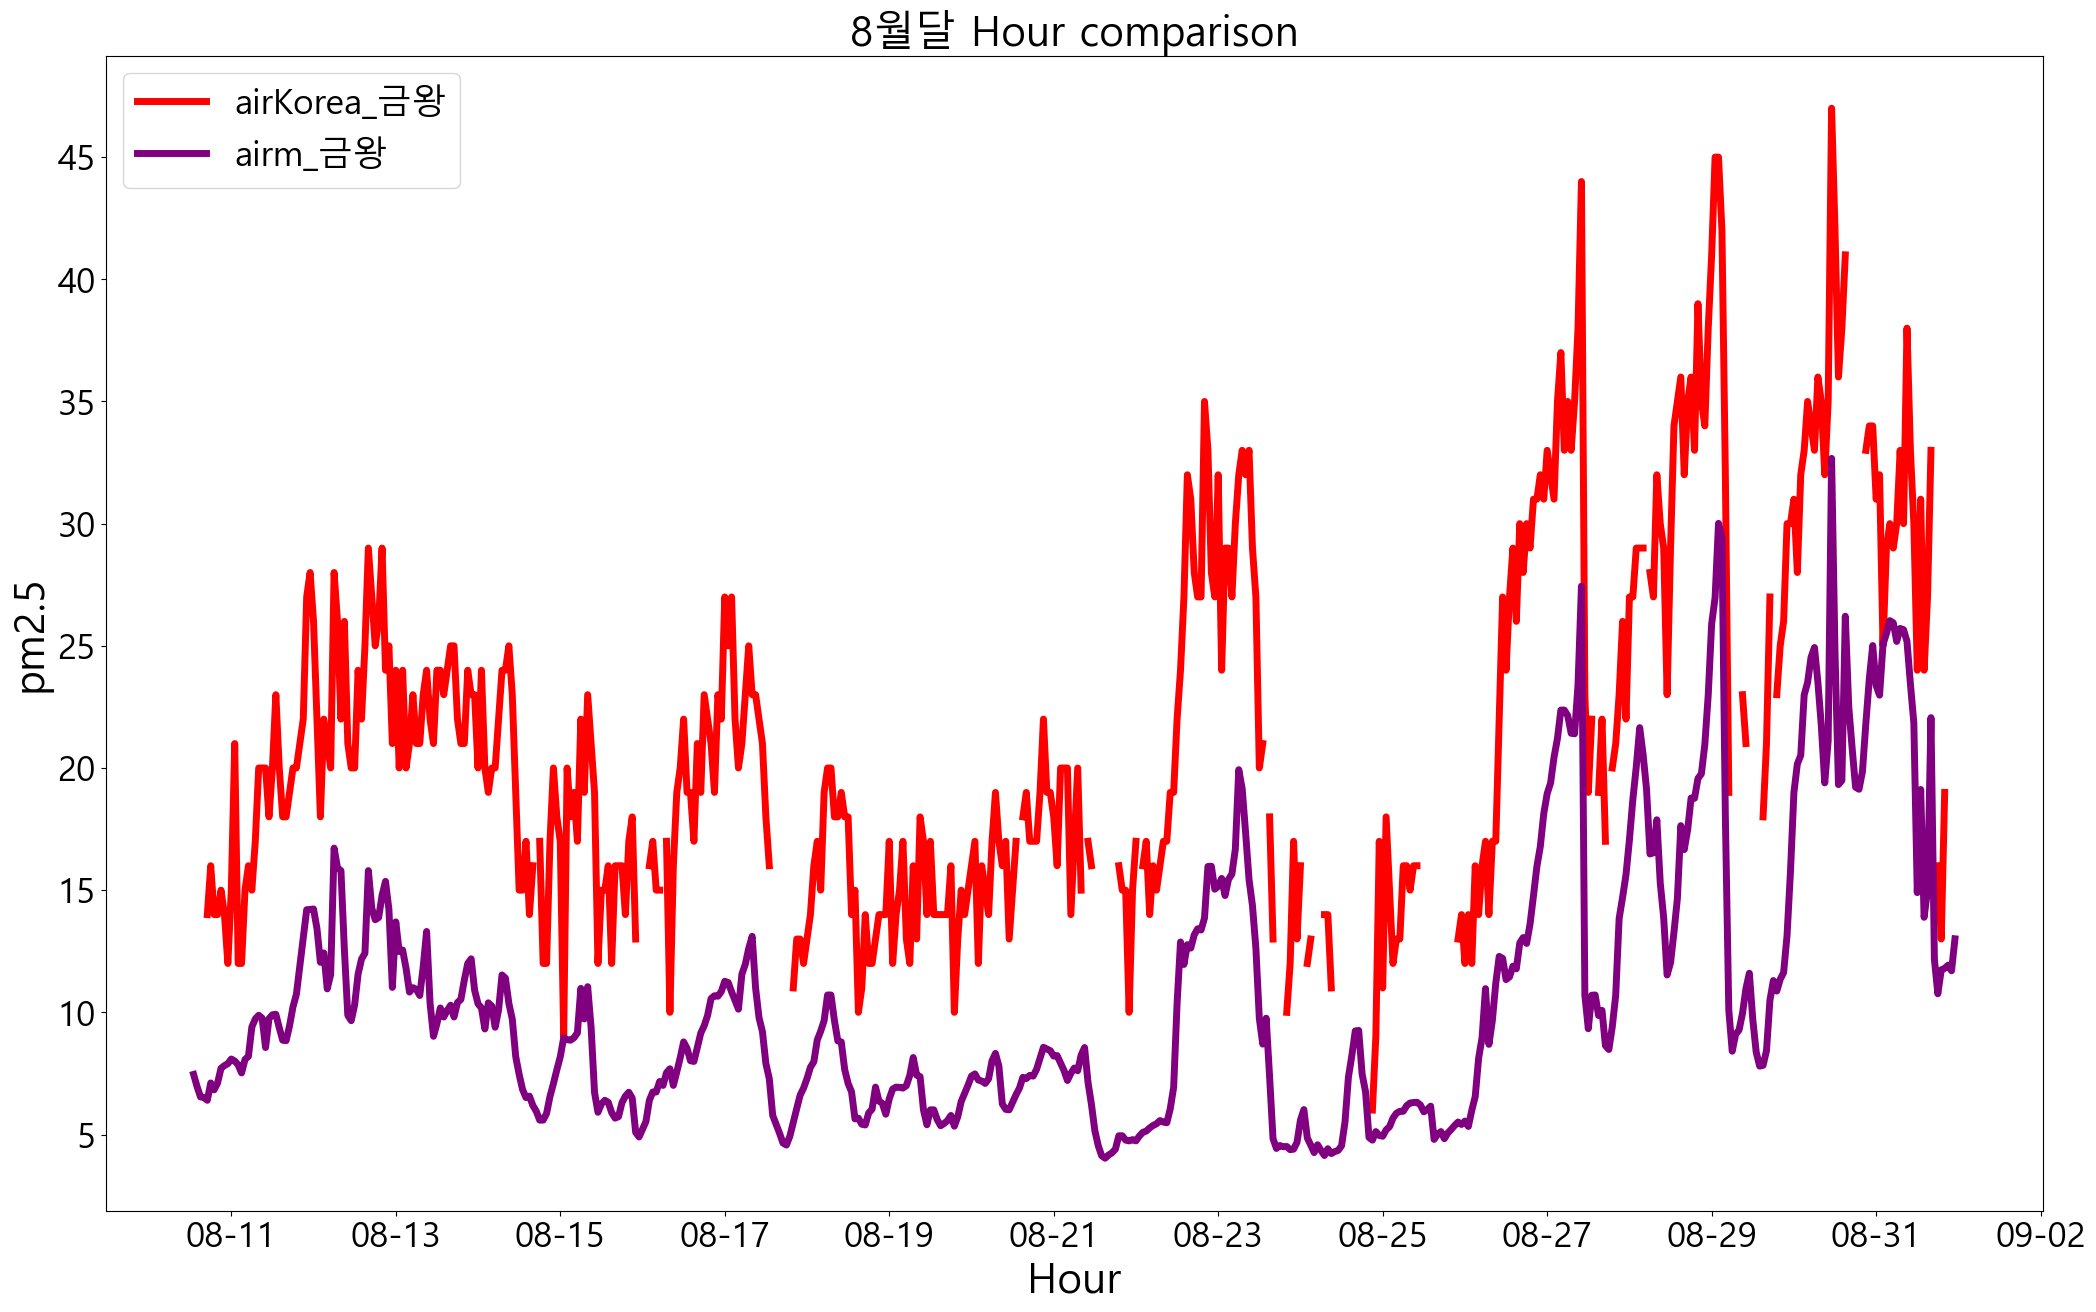

In [7]:
arim_data = pd.read_csv('./비교/금왕/OA200_금왕.csv')
airKorea_data = pd.read_csv('./비교/금왕/AirKorea_금왕.csv')

arim_data['Date'] = arim_data.Date.apply(pd.to_datetime)
airKorea_data['Date'] = airKorea_data.Date.apply(pd.to_datetime)

arim_data = arim_data.groupby([pd.Grouper(key='Date', freq='H')]).mean()
airKorea_data = airKorea_data.groupby([pd.Grouper(key='Date', freq='H')]).mean()

# 구간 나누기
arim_data = arim_data.loc['2021-08-10 13:00':'2021-08-31 23:00']
airKorea_data = airKorea_data.loc['2021-08-10 13:00':'2021-08-31 23:00']


# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.plot(airKorea_data.index, airKorea_data.pm25, color="red", linewidth="5")
plt.plot(arim_data.index, arim_data.pm25, color='purple', linewidth="5")
plt.xlabel('Hour', fontsize=30)
plt.ylabel('pm2.5', fontsize=30)
plt.legend(('airKorea_금왕','airm_금왕'))
plt.title('8월달 Hour comparison')
plt.show()

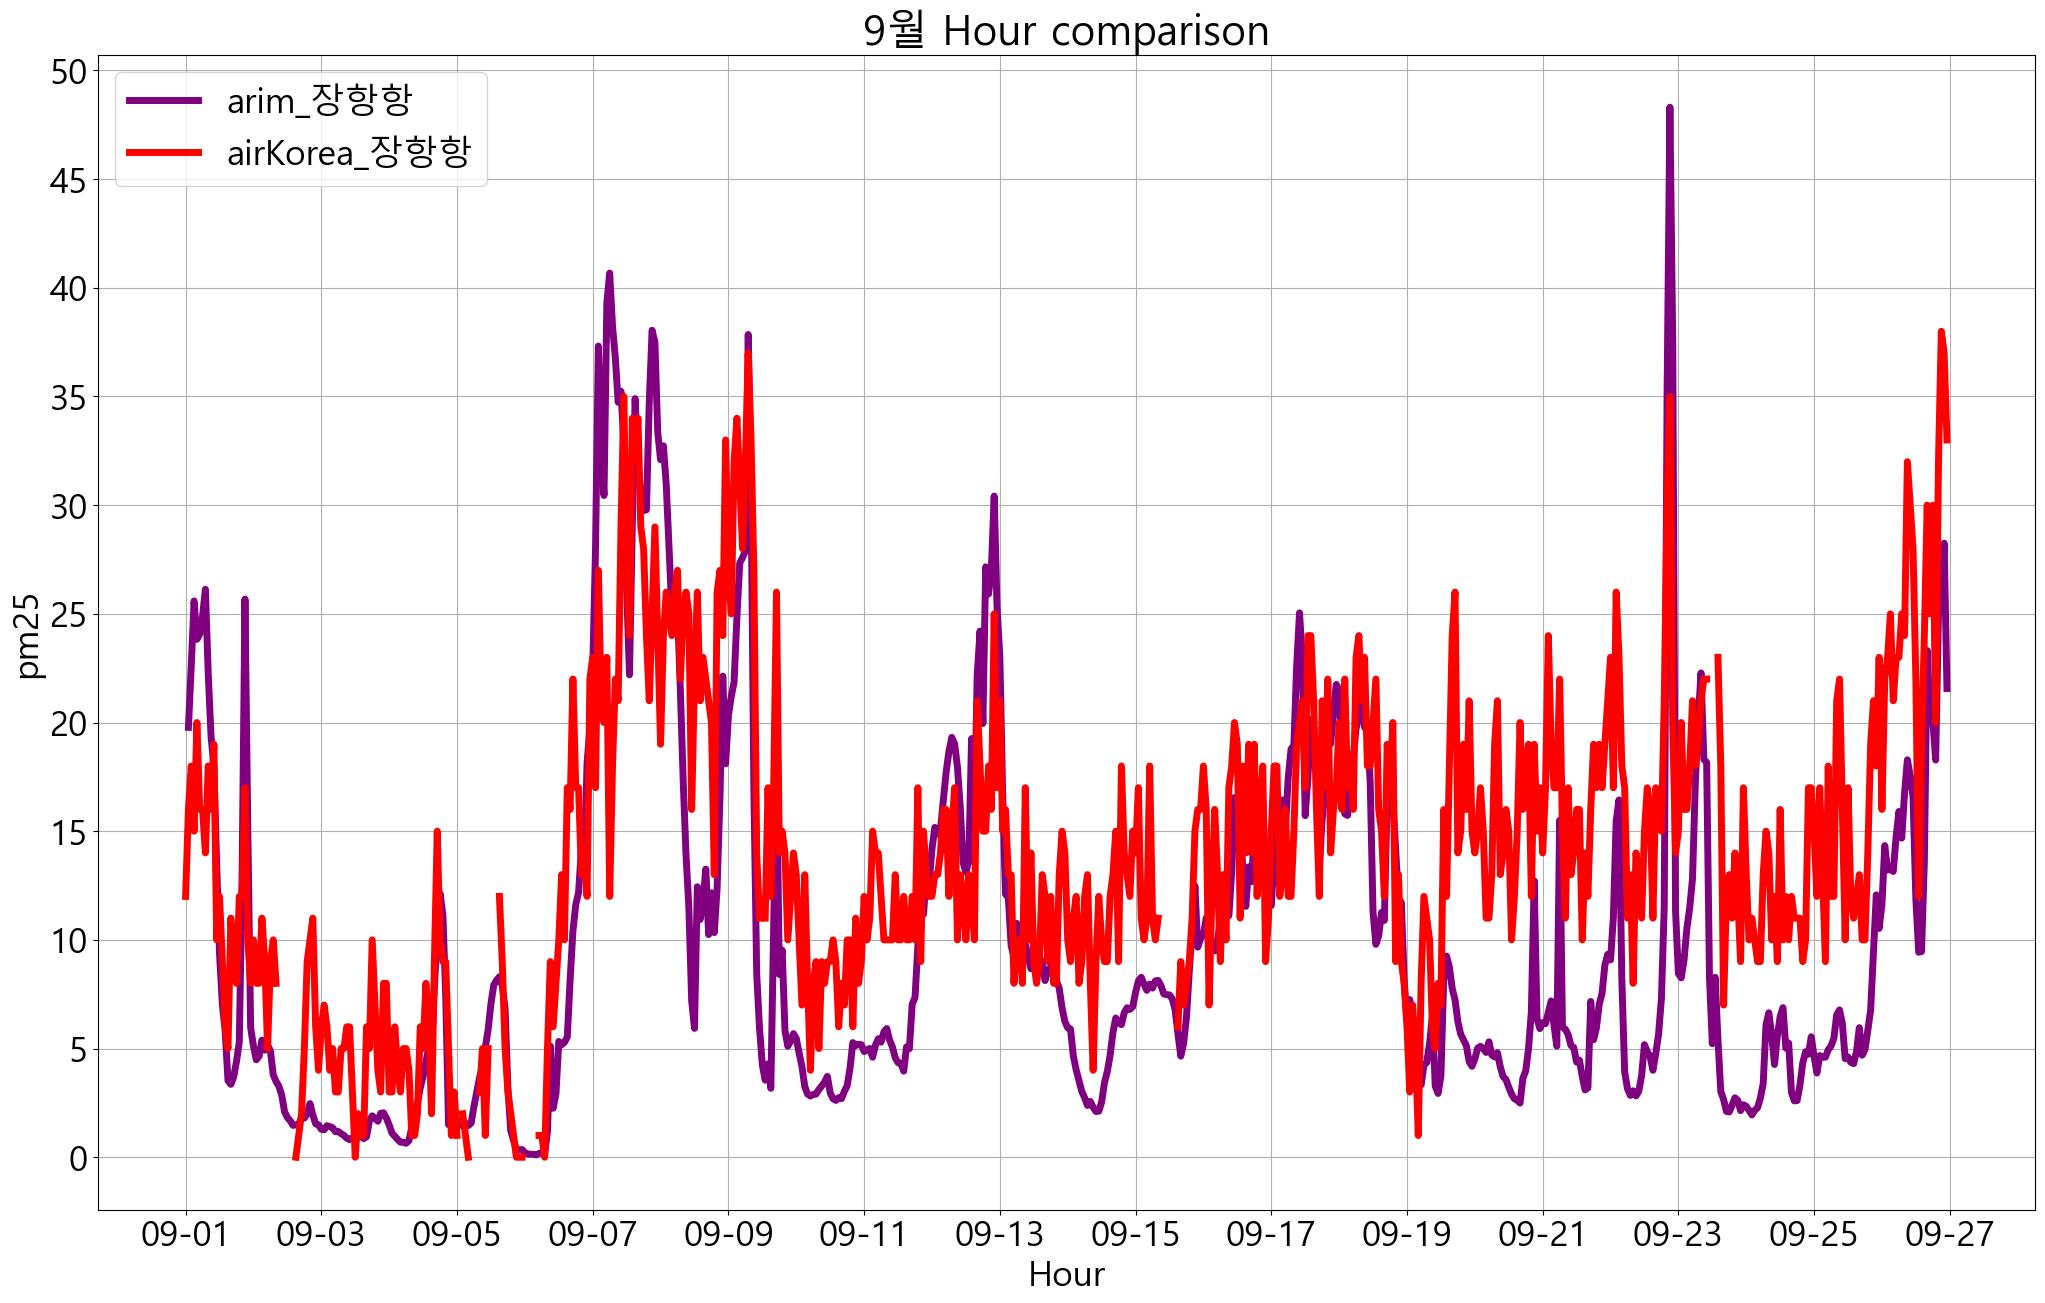

In [26]:
arim_data = pd.read_csv('./비교/장항항/9월/OA200#1_9월 MA.csv')
airKorea_data = pd.read_csv('./비교/장항항/9월/airkorea_장항항_9월.csv')

arim_data['date'] = arim_data.date.apply(pd.to_datetime)
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

arim_data = arim_data.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 구간 나누기
arim_data = arim_data.loc['2022-09-01 00:00':'2022-09-26 23:00']
airKorea_data = airKorea_data.loc['2022-09-01 00:00':'2022-09-26 23:00']

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=12))
plt.plot(arim_data.index, arim_data['PM2.5'], color="purple", linewidth="5")
plt.plot(airKorea_data.index, airKorea_data['PM2.5'], color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm25')
plt.legend(('arim_장항항','airKorea_장항항'))
plt.title('9월 Hour comparison')
plt.grid()
plt.show()

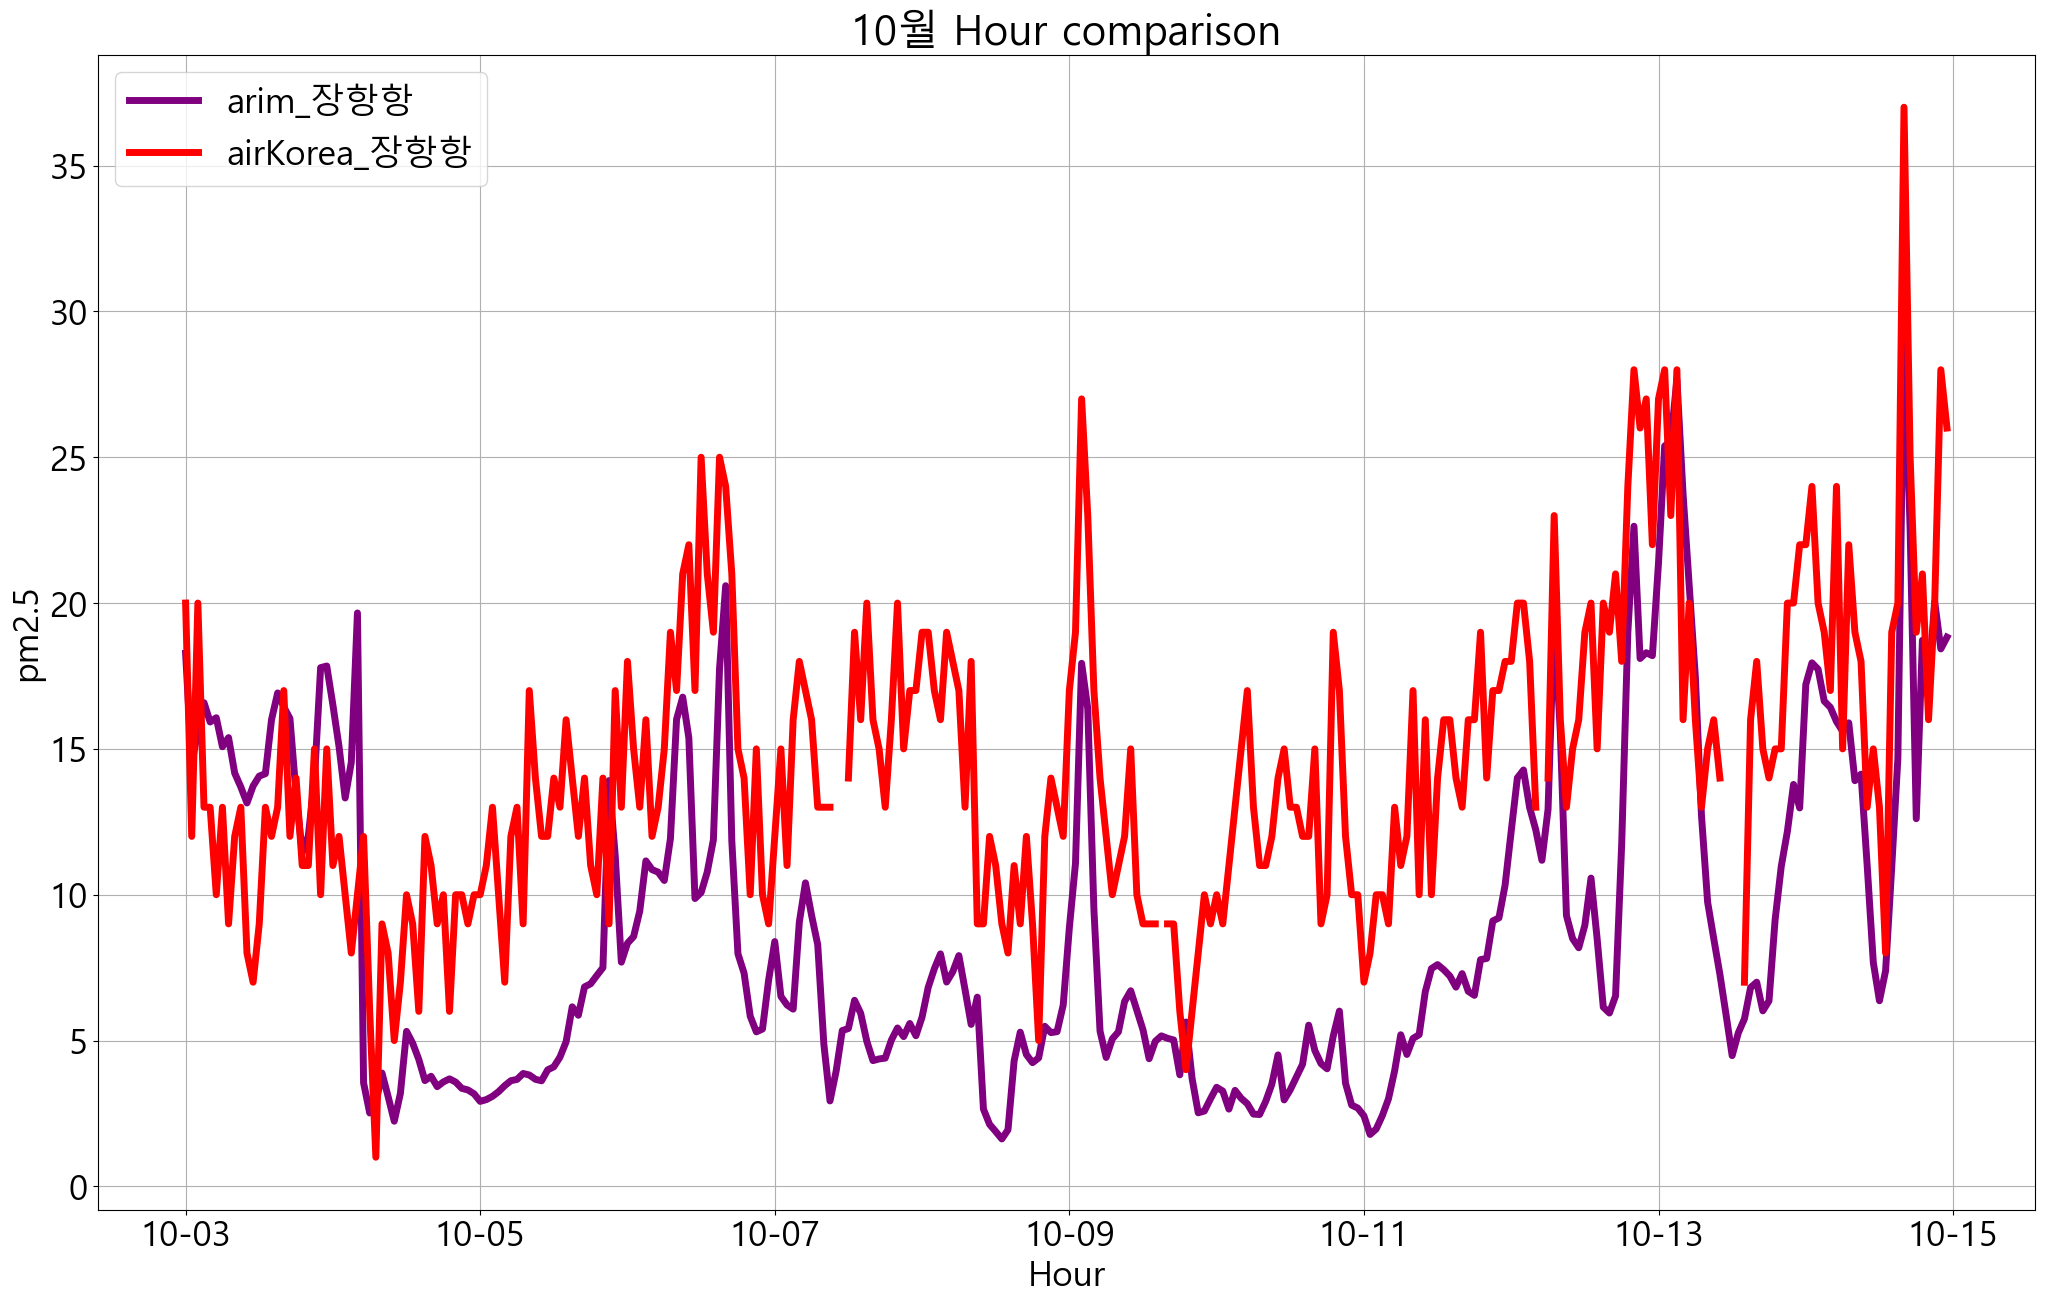

In [27]:
arim_data = pd.read_csv('./비교/장항항/10월/OA200#1_10월 MA.csv')
airKorea_data = pd.read_csv('./비교/장항항/10월/airkorea_장항항_10월.csv')

arim_data['date'] = arim_data.date.apply(pd.to_datetime)
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

arim_data = arim_data.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 구간 나누기
arim_data = arim_data.loc['2022-10-03 00:00':'2022-10-14 23:00']
airKorea_data = airKorea_data.loc['2022-10-03 00:00':'2022-10-14 23:00']

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.plot(arim_data.index, arim_data['PM2.5'], color="purple", linewidth="5")
plt.plot(airKorea_data.index, airKorea_data['PM2.5'], color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('arim_장항항','airKorea_장항항'))
plt.title('10월 Hour comparison')
plt.grid()
plt.show()

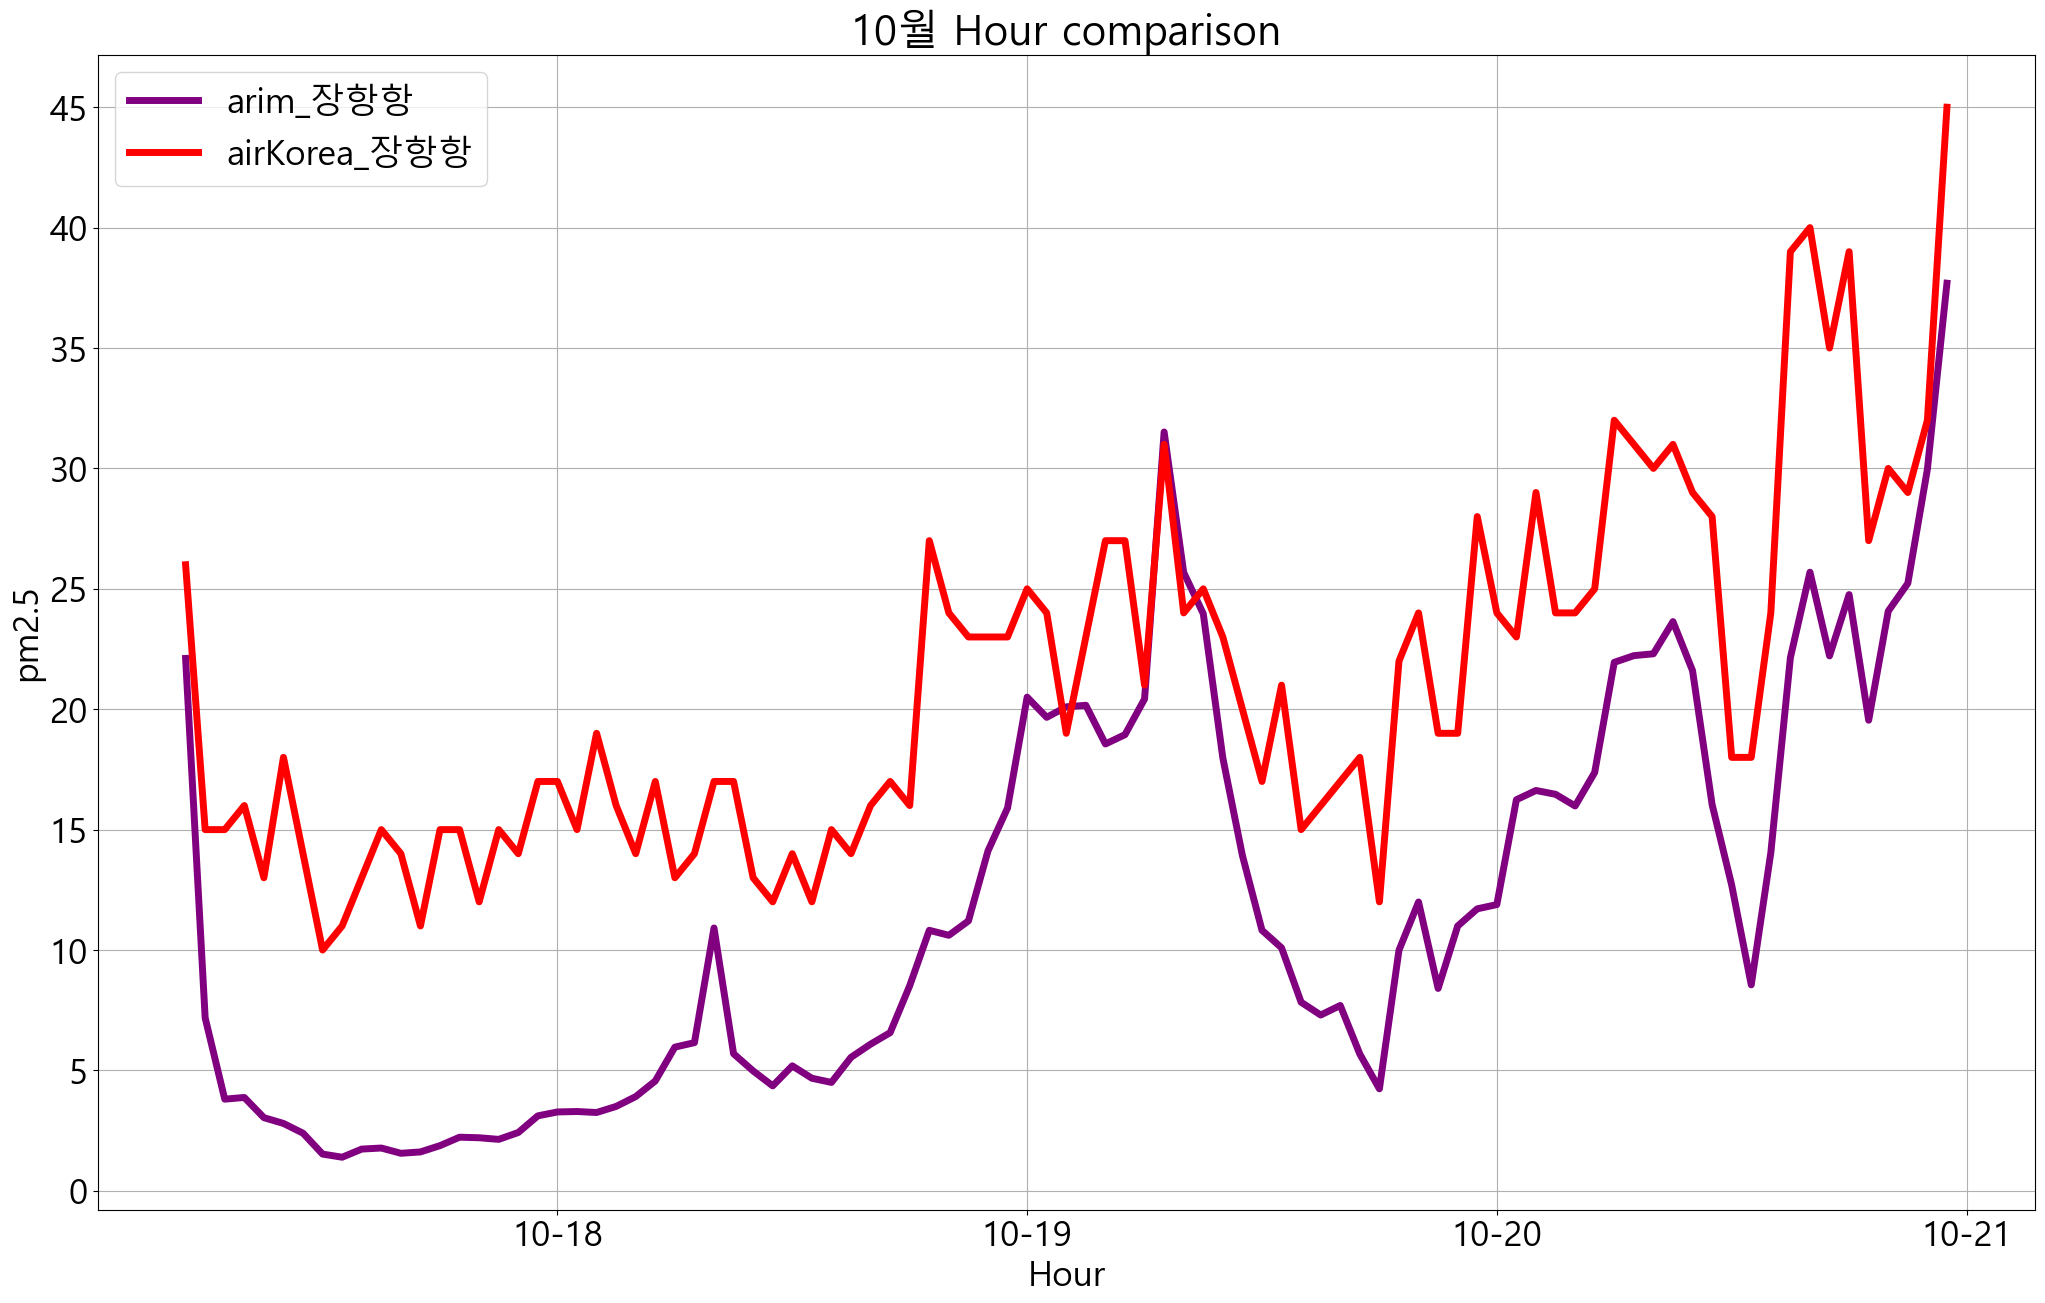

In [33]:
arim_data = pd.read_csv('./비교/장항항/10월/OA200#1_10월 MA.csv')
airKorea_data = pd.read_csv('./비교/장항항/10월/airkorea_장항항_10월.csv')

arim_data['date'] = arim_data.date.apply(pd.to_datetime)
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

arim_data = arim_data.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 구간 나누기
arim_data = arim_data.loc['2022-10-17 05:00':'2022-10-20 23:00']
airKorea_data = airKorea_data.loc['2022-10-17 05:00':'2022-10-20 23:00']

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))
plt.plot(arim_data.index, arim_data['PM2.5'], color="purple", linewidth="5")
plt.plot(airKorea_data.index, airKorea_data['PM2.5'], color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('arim_장항항','airKorea_장항항'))
plt.title('10월 Hour comparison')
plt.grid()
plt.show()